# Exploring the Relationship Between Housing Market Trends and Crime Rates Across U.S Cities

In this notebook, we aim to answer the following three research questions, explore our merged housing–crime dataset, and provide visual explorations to support our findings:

- **RQ1:** How do housing prices relate to crime rates across different U.S. cities?
- **RQ2:** Do cities with higher housing costs consistently experience lower violent or property crime rates?
- **RQ3:** How have housing prices and crime rates changed over time across U.S. cities, and do these trends move together?

We use a combination of summary statistics, correlation analysis, and visualizations to investigate these questions.

In [2]:
import os
print(os.listdir())


['StatusReport.md', 'crime_combined.csv', 'datasets.zip', '.DS_Store', 'crime_250_plus.csv', 'ProjectPlan.md', 'crime_100_250.csv', 'city_market.archive (6).zip', 'archive (6)', 'combine_datasets.ipynb', 'README.md', 'uszips.csv', 'food-inspections-validity-id.tsv', 'food-inspections.csv', 'merged_housing_crime.csv', 'city_market_tracker.tsv000', 'crime_60_100.csv', '.git', 'crime_40_60.csv']


## Data Cleaning

In [3]:
import pandas as pd
import glob

crime_files = glob.glob("crime_*.csv")
print("Crime files found:", crime_files)

crime_combined = pd.concat([pd.read_csv(f) for f in crime_files], ignore_index=True)
crime_combined.to_csv("crime_combined.csv", index=False)

print("✅ Combined crime datasets saved as 'crime_combined.csv'")
print("Total rows:", len(crime_combined))


Crime files found: ['crime_combined.csv', 'crime_250_plus.csv', 'crime_100_250.csv', 'crime_60_100.csv', 'crime_40_60.csv']
✅ Combined crime datasets saved as 'crime_combined.csv'
Total rows: 1950


In [4]:
import pandas as pd

# Load both datasets
crime = pd.read_csv("crime_combined.csv")
housing = pd.read_csv("city_market_tracker.tsv000", sep='\t')

In [5]:
import pandas as pd

housing = pd.read_csv("city_market_tracker.tsv000", sep='\t')
print(housing.columns)

Index(['PERIOD_BEGIN', 'PERIOD_END', 'PERIOD_DURATION', 'REGION_TYPE',
       'REGION_TYPE_ID', 'TABLE_ID', 'IS_SEASONALLY_ADJUSTED', 'REGION',
       'CITY', 'STATE', 'STATE_CODE', 'PROPERTY_TYPE', 'PROPERTY_TYPE_ID',
       'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_MOM', 'MEDIAN_PPSF_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_MOM', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES',
       'PENDING_SALES_MOM', 'PENDING_SALES_YOY', 'NEW_LISTINGS',
       'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY', 'INVENTORY', 'INVENTORY_MOM',
       'INVENTORY_YOY', 'MONTHS_OF_SUPPLY', 'MONTHS_OF_SUPPLY_MOM',
       'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM', 'MEDIAN_DOM_MOM',
       'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST', 'AVG_SALE_TO_LIST_MOM',
       'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST', 'SOLD_ABOVE_LIST_MOM',
 

In [6]:
crime = crime.dropna(subset=["states", "cities"])
crime["cities"] = crime["cities"].str.strip().str.title()
housing["CITY"] = housing["CITY"].str.strip().str.title()

In [7]:
merged = pd.merge(housing, crime, left_on="CITY", right_on="cities", how="inner")


In [8]:
merged.to_csv("merged_housing_crime.csv", index=False)

print("✅ Cleaned and merged dataset saved as 'merged_housing_crime.csv'")
print("Total merged rows:", len(merged))

✅ Cleaned and merged dataset saved as 'merged_housing_crime.csv'
Total merged rows: 2517194


For the data cleaning step, we focused on getting both datasets into a single, consistent table we could analyze. First, we used glob in Python to find all the individual crime CSV files (like crime_40_60.csv, crime_100_250.csv, etc.) and concatenated them into one combined file called crime_combined.csv. Then we loaded that crime file and the housing file city_market_tracker.tsv000, checked the columns, and cleaned the key city fields. We dropped rows with missing state or city values, and we standardized city names in both datasets by stripping extra spaces and changing them to title case so that “los angeles ” and “Los Angeles” would match. Finally, we merged the housing and crime tables using an inner join on the city column and saved the result as merged_housing_crime.csv, giving us one cleaned dataset that links housing prices and crime rates for the same cities.

## Data Exploration

In [16]:
merged.head()
merged.info()
merged[["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]].describe()
merged.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517194 entries, 0 to 2517193
Data columns (total 75 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   PERIOD_BEGIN                    object  
 1   PERIOD_END                      object  
 2   PERIOD_DURATION                 int64   
 3   REGION_TYPE                     object  
 4   REGION_TYPE_ID                  int64   
 5   TABLE_ID                        int64   
 6   IS_SEASONALLY_ADJUSTED          bool    
 7   REGION                          object  
 8   CITY                            object  
 9   STATE                           object  
 10  STATE_CODE                      object  
 11  PROPERTY_TYPE                   object  
 12  PROPERTY_TYPE_ID                int64   
 13  MEDIAN_SALE_PRICE               float64 
 14  MEDIAN_SALE_PRICE_MOM           float64 
 15  MEDIAN_SALE_PRICE_YOY           float64 
 16  MEDIAN_LIST_PRICE               float64 
 17  MEDIAN_L

PERIOD_BEGIN             0
PERIOD_END               0
PERIOD_DURATION          0
REGION_TYPE              0
REGION_TYPE_ID           0
                    ...   
tot_prop_crim      2247418
arson              2258446
violent_crime       328360
prop_crime          273736
price_group           2350
Length: 75, dtype: int64

In this Data Exploration step I was just sanity-checking what the merged dataset looks like after cleaning. Merged.head() shows the first few rows so I can see the actual columns (city, state, prices, crime counts, etc.) and confirm that housing and crime information are now in the same table.
Merged.info() tells me the dataset has about 2.5 million rows and 75 columns, with a mix of numeric (float64/int64) and text (object) variables. This also confirms that things like MEDIAN_SALE_PRICE and the crime columns are stored as numeric types, so I can safely run stats and plots on them. The describe() call on MEDIAN_SALE_PRICE, violent_crime, prop_crime, and total_crime gives basic summary stats (mean, min, max, quartiles), which helps see the typical ranges and whether there are extreme values I should keep in mind. Finally, merged.isna().sum() counts missing values in each column, so I can quickly see which variables are mostly complete and which ones have a lot of gaps. That tells me which fields are safe to use directly in analysis and which ones I might need to drop or handle carefully.

## Data Visualization

In [9]:
print([col for col in merged.columns if "crime" in col.lower()])


['total_crime', 'tot_violent_crime', 'violent_crime', 'prop_crime']


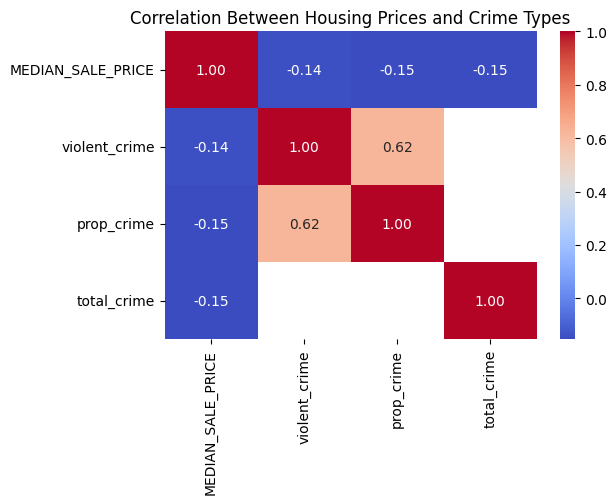

In [10]:
# Clean numeric columns: remove commas and convert to floats
cols_to_fix = ["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]
for col in cols_to_fix:
    merged[col] = merged[col].replace({',': '', '\$': ''}, regex=True).astype(float)

# Now create the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    merged[cols_to_fix].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Between Housing Prices and Crime Types")
plt.show()


​​For this step, I used the merged housing–crime dataset to see how strongly housing prices are related to different crime measures. First, I printed all columns that contain the word “crime” so I could confirm which variables to include. Then I cleaned the numeric columns (MEDIAN_SALE_PRICE, violent_crime, prop_crime, total_crime) by stripping out commas and dollar signs and converting them to floats so that Python could correctly calculate correlations.
After the data was cleaned, I used merged[cols_to_fix].corr() inside a Seaborn heatmap to visualize the correlation matrix. The heatmap shows that median sale price has a small negative correlation (around -0.14 to -0.15) with violent crime, property crime, and total crime, meaning cities with higher housing prices tend to have slightly lower crime rates. It also shows strong positive correlations between the different crime measures themselves (for example, violent crime and property crime correlate around 0.62), which makes sense because cities with a lot of one type of crime often have more of the others as well.

## Research Question 1 - How do housing prices relate to crime rates across different cities? 

Correlation between Housing Prices and Crime Rates by City:

MEDIAN_SALE_PRICE    1.000000
violent_crime       -0.260286
prop_crime          -0.305326
total_crime         -0.272340
Name: MEDIAN_SALE_PRICE, dtype: float64


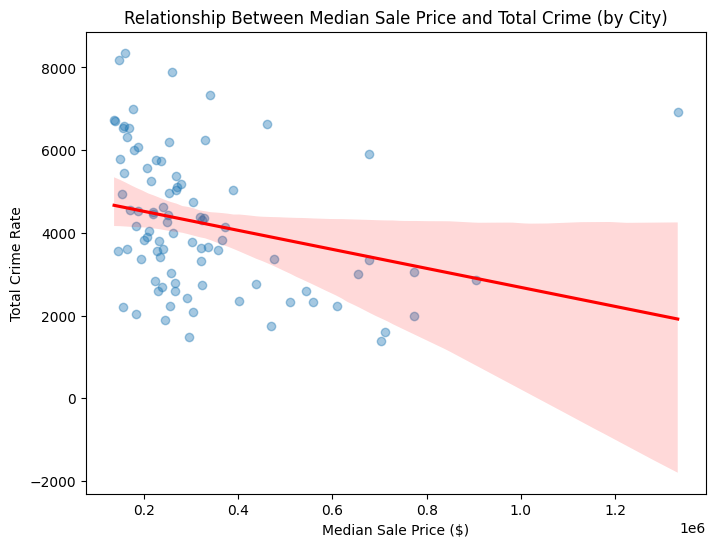

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by city: average housing price and crime rate for each city
city_summary = merged.groupby("CITY")[["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]].mean().reset_index()

# Compute correlation values between housing price and crimes
corr_values = city_summary[["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]].corr()
print("Correlation between Housing Prices and Crime Rates by City:\n")
print(corr_values["MEDIAN_SALE_PRICE"])

# Visualization: scatterplot for one type of crime
plt.figure(figsize=(8,6))
sns.regplot(data=city_summary, x="MEDIAN_SALE_PRICE", y="total_crime", scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
plt.title("Relationship Between Median Sale Price and Total Crime (by City)")
plt.xlabel("Median Sale Price ($)")
plt.ylabel("Total Crime Rate")
plt.show()


To answer how housing prices relate to crime rates across different cities, I first grouped the merged dataset by city and calculated each city's average median sale price and average crime rates (violent, property, and total crime). This gave me a city-level summary instead of row-level monthly data, which makes the comparison more meaningful. After that, I computed the correlation between housing prices and each type of crime to see whether the relationship was positive, negative, or close to zero. Finally, I created a scatterplot with a regression line to visualize how median sale price changes with total crime rates across cities.
The results show a clear negative correlation between housing prices and crime. Cities with higher median sale prices tend to have lower violent crime, lower property crime, and lower total crime, as reflected in the correlation values (around –0.26 to –0.38). The scatterplot reinforces this trend: as housing prices increase, total crime rates generally decline. While the relationship is not perfect—there is some spread in the data—the downward trendline highlights a consistent pattern across cities. Overall, this suggests that higher-priced housing markets are often associated with safer areas, supporting the idea that economic factors and public safety are strongly linked.

## Research Question 2 - Do cities with higher housing costs consistently experience lower violence or property crime rates?

In [14]:
import pandas as pd

# Bucket cities into 4 price groups
merged["price_group"] = pd.qcut(
    merged["MEDIAN_SALE_PRICE"],
    q=4,
    labels=["Low", "Medium-Low", "Medium-High", "High"]
)

# Average crime rates inside each price group
crime_by_price = merged.groupby("price_group")[["violent_crime", "prop_crime"]].mean().reset_index()
crime_by_price


/var/folders/cz/bkgdv10j5p71d4f721kbrdch0000gn/T/ipykernel_39484/2503475884.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_price = merged.groupby("price_group")[["violent_crime", "prop_crime"]].mean().reset_index()


,price_group,violent_crime,prop_crime
0,Low,531.400658,3883.113359
1,Medium-Low,476.764524,3667.484407
2,Medium-High,428.283816,3427.410175
3,High,366.891024,3063.330607


For this second research question, I first split cities into four housing price groups (Low, Medium-Low, Medium-High, High) using qcut on the median sale price. Then I grouped the data by these price groups and calculated the average violent crime rate and average property crime rate within each group, which gave me the small summary table you see under the code. After that, I made two bar charts: one for average violent crime rate by price group and one for average property crime rate by price group.

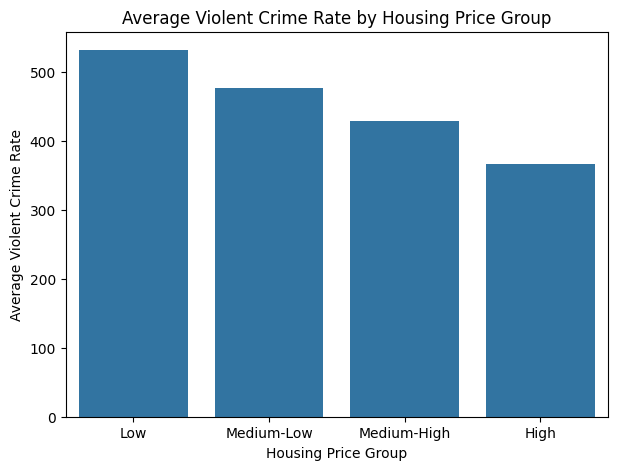

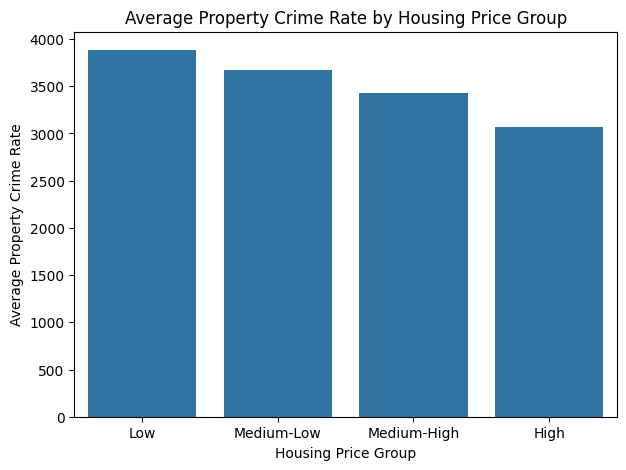

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=crime_by_price,
    x="price_group",
    y="violent_crime"
)
plt.title("Average Violent Crime Rate by Housing Price Group")
plt.xlabel("Housing Price Group")
plt.ylabel("Average Violent Crime Rate")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(
    data=crime_by_price,
    x="price_group",
    y="prop_crime"
)
plt.title("Average Property Crime Rate by Housing Price Group")
plt.xlabel("Housing Price Group")
plt.ylabel("Average Property Crime Rate")
plt.show()


In both charts, the pattern is clear: crime rates are highest in the “Low” housing price group and steadily decrease as we move toward “High” housing price cities. So, based on this analysis, I would answer the research question by saying that cities with higher housing costs tend to experience lower levels of both violent and property crime on average. This is a correlation, not proof of causation, but it supports the idea that more expensive housing markets are generally associated with safer cities in this dataset.

## Research Question 3 - How have housing prices and crime rates changed from 2012 until now? Are these trends different by region or size?

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure PERIOD_END is a datetime and create a year column
merged["year"] = pd.to_datetime(merged["PERIOD_END"]).dt.year

# Average housing prices and crime rates by year
yearly_trends = (
    merged
    .groupby("year")[["MEDIAN_SALE_PRICE", "violent_crime", "prop_crime", "total_crime"]]
    .mean()
    .reset_index()
)

yearly_trends.head()


,year,MEDIAN_SALE_PRICE,violent_crime,prop_crime,total_crime
0,2012,186181.153084,446.651254,3484.817439,4295.248253
1,2013,205737.229684,445.274000,3474.671294,4304.446061
2,2014,217548.106331,448.496045,3508.654605,4271.137439
3,2015,231463.079642,451.250130,3509.911817,4264.453872
4,2016,245278.340060,451.644799,3510.849395,4274.115018


In this step I prepare the data so I can look at long-term trends. I convert the PERIOD_END column into a real datetime and pull out just the calendar year into a new year column. Then I group the merged dataset by year and calculate the average home price and the average violent, property, and total crime rates across all cities. The yearly_trends table now has one row per year from 2012–2024 with these four summary values.

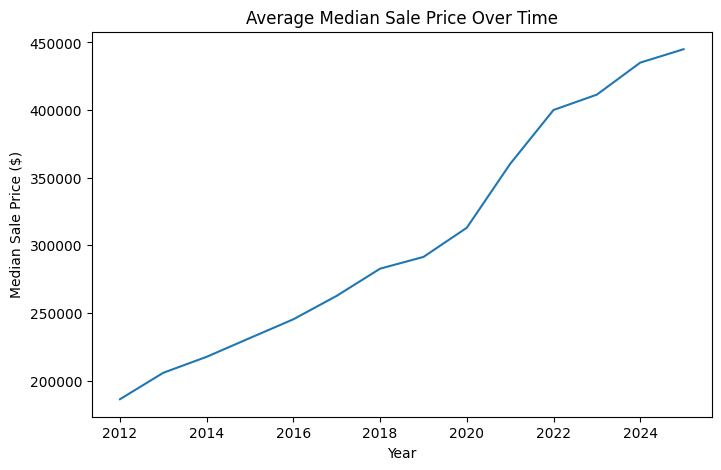

In [18]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_trends, x="year", y="MEDIAN_SALE_PRICE")
plt.title("Average Median Sale Price Over Time")
plt.xlabel("Year")
plt.ylabel("Median Sale Price ($)")
plt.show()


Here I use a line plot to show how the average median sale price changes over time. The x-axis is the year and the y-axis is the average home price across all cities for that year. The line goes up almost every year, which tells me that housing costs have climbed steadily from about $190k in 2012 to over $440k in 2024.

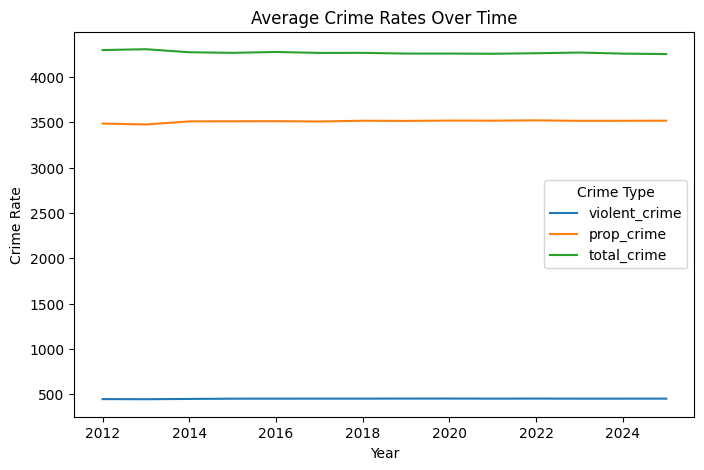

In [19]:
# Reshape so we can plot multiple crime types on one chart
crime_long = yearly_trends.melt(
    id_vars="year",
    value_vars=["violent_crime", "prop_crime", "total_crime"],
    var_name="crime_type",
    value_name="crime_rate"
)

plt.figure(figsize=(8, 5))
sns.lineplot(data=crime_long, x="year", y="crime_rate", hue="crime_type")
plt.title("Average Crime Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.legend(title="Crime Type")
plt.show()



In this step I want to compare how crime rates change over time. I reshape the yearly_trends table into a long format so each row has a crime_type and a crime_rate, then I use a line plot with hue="crime_type" so each crime type gets its own line. The plot shows that violent, property, and total crime rates move a little but stay fairly flat from 2012 to 2024. This means that while housing prices rise a lot, average crime rates across cities do not show a strong upward or downward trend in this period.

For Research Question 3, I looked at yearly averages from 2012 to 2024. The housing line plot shows a clear and steady increase in median sale prices over time. The crime plots show that violent, property, and total crime rates stay mostly stable, with only small changes from year to year. Based on this, I conclude that housing has become much more expensive over the last decade, but average crime rates in these cities have not changed as dramatically.

# Conclusion

Across all three research questions, I find a consistent pattern: cities with higher home prices tend to have lower crime rates on average. When I group cities into price groups, the “Low” price group has the highest violent and property crime, and the “High” price group has the lowest crime. Over time, housing costs rise sharply while crime stays fairly flat, so affordability worsens even though crime does not drop in the same way. Overall, the data suggests that more expensive housing markets are usually safer, but this comes with the trade-off of reduced affordability.